In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('sales_data_sample.csv', encoding="unicode_escape")
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [19]:
df = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']]
df

,QUANTITYORDERED,PRICEEACH,SALES
0,30,95.70,2871.00
1,34,81.35,2765.90
2,41,94.74,3884.34
3,45,83.26,3746.70
4,49,100.00,5205.27
...,...,...,...
2818,20,100.00,2244.40
2819,29,100.00,3978.51
2820,43,100.00,5417.57
2821,34,62.24,2116.16


In [20]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

inertia

[9574958418.900711,
 3322523909.538967,
 1729849507.7748928,
 1040493913.1389799,
 715162927.8934009,
 512098415.2645861,
 387488423.0042006,
 328403940.99748516,
 233699440.40555504,
 190757293.45066682]

<Axes: >

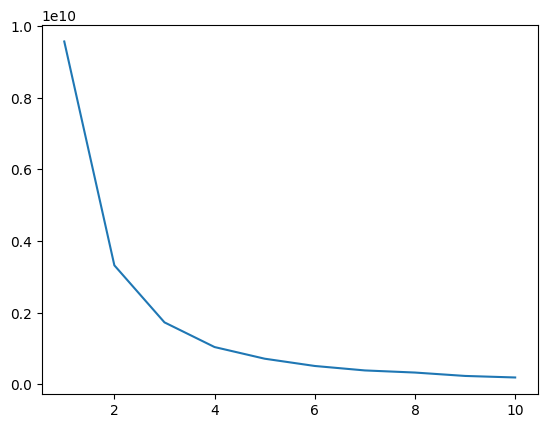

In [21]:
sns.lineplot(x=range(1, 11), y=inertia)

In [22]:
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(df)
df

/var/folders/3n/qtk5fs8x50789vcfklq5_plc0000gn/T/ipykernel_1284/2031590712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df)


,QUANTITYORDERED,PRICEEACH,SALES,Cluster
0,30,95.70,2871.00,0
1,34,81.35,2765.90,0
2,41,94.74,3884.34,0
3,45,83.26,3746.70,0
4,49,100.00,5205.27,2
...,...,...,...,...
2818,20,100.00,2244.40,3
2819,29,100.00,3978.51,0
2820,43,100.00,5417.57,2
2821,34,62.24,2116.16,3


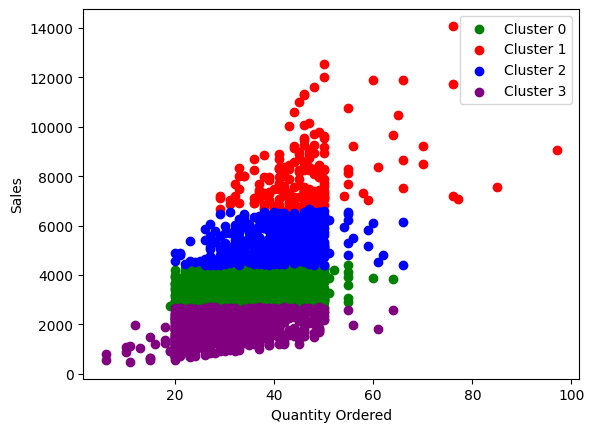

In [25]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]

# Scatter plot for each cluster with distinct colors
plt.scatter(df1['QUANTITYORDERED'], df1['SALES'], color='green', label='Cluster 0')
plt.scatter(df2['QUANTITYORDERED'], df2['SALES'], color='red', label='Cluster 1')
plt.scatter(df3['QUANTITYORDERED'], df3['SALES'], color='blue', label='Cluster 2')
plt.scatter(df4['QUANTITYORDERED'], df4['SALES'], color='purple', label='Cluster 3')

# Label the axes
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')

# Display the legend
plt.legend()